In [1]:
import os
os.getcwd()
os.chdir('Downloads')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [3]:
data=pd.read_csv('Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [6]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


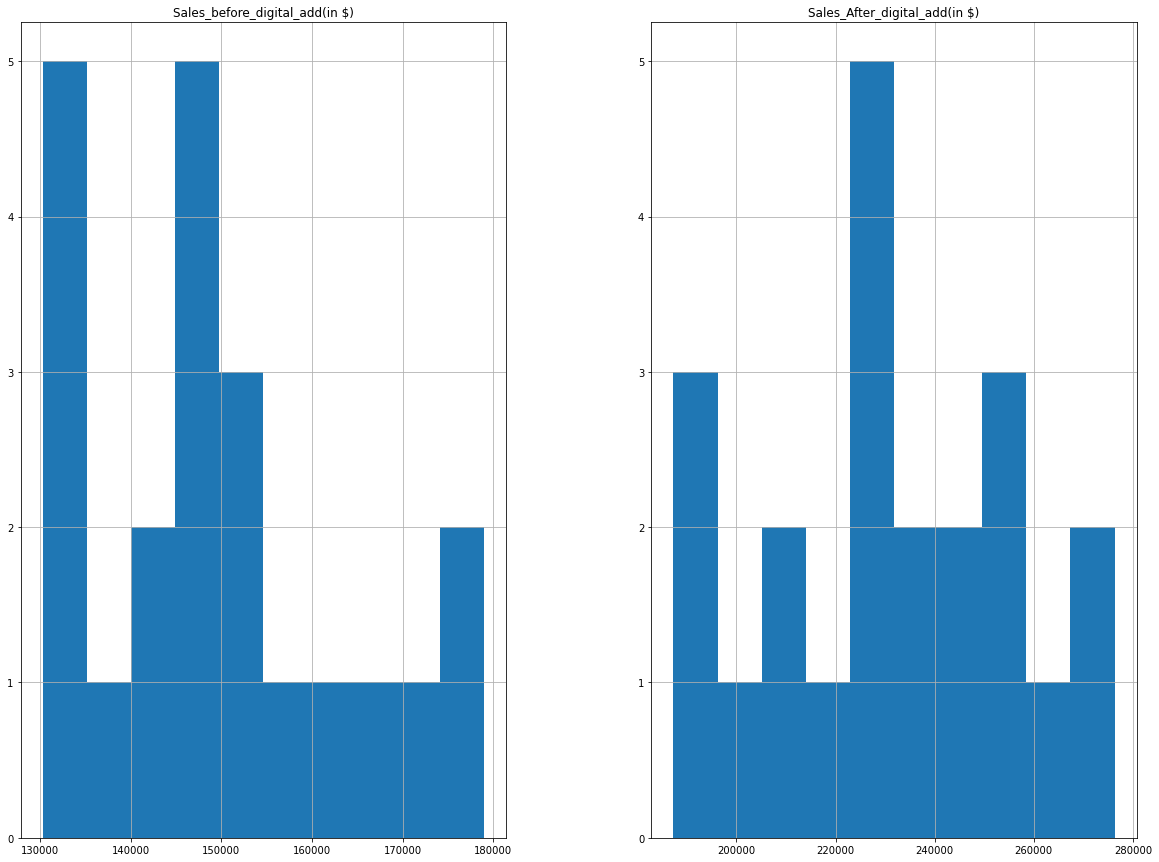

In [7]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

# 1. Clarify whether there is any increase in sales after stepping into digital marketing.


H0:There is no increase in sales after stepping to digital marketing.
H1:There is an increase in sales after stepping to digital marketing.

In [8]:
_,p_value=ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])
print("p_value:",p_value)

p_value: 6.336667004575778e-11


In [9]:
if p_value<=0.05:
    print("There is an increase in sales after stepping to digital marketing")
else:
    print("There is no increase in sales after stepping to digital marketing")

There is an increase in sales after stepping to digital marketing


# 2.Check whether there is any dependency between the features “Region” and “Manager”.

H0:There is no relation b/w region and manager.
H1:There is significant relation b/w region and manager.

In [10]:
table=pd.crosstab(data['Region'],data['Manager'])
table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [11]:
obsval=table.values
print("Observed values:-\n",obsval)

Observed values:-
 [[4 3 3]
 [4 1 2]
 [1 3 1]]


In [12]:
import scipy.stats as stats

In [13]:
val=stats.chi2_contingency(table)
val

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [14]:
expected_value=val[3]
expected_value

array([[4.09090909, 3.18181818, 2.72727273],
       [2.86363636, 2.22727273, 1.90909091],
       [2.04545455, 1.59090909, 1.36363636]])

In [15]:
no_of_rows=len(table.iloc[0:2,0])
no_of_columns=len(table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
alpha=0.05

In [16]:
from scipy.stats import chi2
chisquare=sum([(o-e)**2/e for o,e in zip(obsval,expected_value)])
chisquare_statistic=chisquare[0]+chisquare[1]

In [17]:
pvalue=1-chi2.cdf(x=chisquare_statistic,df=df)
critical_value=chi2.ppf(q=1-alpha,df=df)

In [18]:
print("level of significance:",alpha)
print('Degrees of freedom:',df)
print('Chi-square statistic :',chisquare_statistic)
print("pvalue:",pvalue)
print("Critical value:",critical_value)

level of significance: 0.05
Degrees of freedom: 1
Chi-square statistic : 2.921995464852608
pvalue: 0.08737974495299139
Critical value: 3.841458820694124


In [19]:
if pvalue<=alpha:
    print("There is a significant relationship betweeen region and manager")
else:
    print("There is no significant relationship betweeen region and manager")
if chisquare_statistic>=critical_value:
     print("There is a significant relationship betweeen region and manager")
else:
    print("There is no significant relationship betweeen region and manager")   

There is no significant relationship betweeen region and manager
There is no significant relationship betweeen region and manager
